In [1]:
from sqlalchemy import create_engine
import pandas as pd
import plotly.express as px
import seaborn as sns

In [17]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [2]:
database = "BWI411"
username = "bwi411_studi"
password = "datascience"
host = "143.93.200.243"

In [3]:
engine = create_engine(f'postgresql://{username}:{password}@{host}:5435/{database}')

Lesen Sie die Tabelle "corona_daten" aus der Datenbank ein. Benutzen Sie dafür die pd.read_sql_query() Funktion.

In [4]:
file = pd.read_sql_query("SELECT * FROM public.corona_daten", engine)

In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   index                                 396 non-null    int64         
 1   IdLandkreis                           396 non-null    int64         
 2   Landkreis                             396 non-null    object        
 3   Datenstand                            396 non-null    datetime64[ns]
 4   AnzahlFall                            396 non-null    int64         
 5   AnzahlTodesfall                       396 non-null    int64         
 6   AnzahlGenesen                         396 non-null    int64         
 7   bundesland                            396 non-null    int64         
 8   gemeindeschluessel                    396 non-null    int64         
 9   anzahl_meldebereiche                  396 non-null    int64         
 10  fa

In [6]:
file["gemeindeschluessel"].count()

396

Berechnen Sie die Todesrate pro Gemeinde und die ICU-Bettenauslastung (ICU = Intensiv-Care-Unit) und speichern Sie diese jeweils in einer neuen Spalte

In [13]:
 file['Todesrate'] = (file.AnzahlTodesfall/file.AnzahlFall) * 100
 file['ICU-Bettenauslastung'] = (file.betten_belegt)/(file.betten_frei+file.betten_belegt) * 100

In [14]:
file.head()

index  IdLandkreis        Landkreis Datenstand  AnzahlFall  \
0      0         1001     SK Flensburg 2021-04-06        2047   
1      1         1002          SK Kiel 2021-04-06        4041   
2      2         1003        SK Lübeck 2021-04-06        4852   
3      3         1004    SK Neumünster 2021-04-06        1462   
4      4         1051  LK Dithmarschen 2021-04-06        1546   

   AnzahlTodesfall  AnzahlGenesen  bundesland  gemeindeschluessel  \
0               39           1860           1                1001   
1               92           3723           1                1002   
2               89           4534           1                1003   
3               22           1309           1                1004   
4               42           1426           1                1051   

   anzahl_meldebereiche  faelle_covid_aktuell  \
0                     3                     3   
1                     5                     6   
2                     2                     6   
3                     1                     0   
4                     1                     0   

   faelle_covid_aktuell_invasiv_beatmet  anzahl_standorte  betten_frei  \
0                                     3                 2            6   
1                                     5                 3           52   
2                                     2                 2           32   
3                                     0                 1            5   
4                                     0                 1            1   

   betten_belegt daten_stand  betten_belegt_nur_erwachsen  \
0             35  2021-04-06                           35   
1            112  2021-04-06                          111   
2            103  2021-04-06                          103   
3             20  2021-04-06                           20   
4             37  2021-04-06                           37   

   betten_frei_nur_erwachsen  Todesrate  ICU-Bettenauslastung  
0                          0   1.905227             85.365854  
1                         47   2.276664             68.292683  
2                         32   1.834295             76.296296  
3                          5   1.504788             80.000000  
4                          1   2.716688             97.368421

Sortieren Sie Ihr DataFrame nach der Todesrate. Welche Gemeinde hatte an diesem Tag die höchste Todesrate? Benutzen Sie folgende Methode: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

In [15]:
file.sort_values(by=['Todesrate'], ascending=False )

index  IdLandkreis        Landkreis Datenstand  AnzahlFall  \
353    353        14626       LK Görlitz 2021-04-06       16768   
42      42         3360        LK Uelzen 2021-04-06        1751   
376    376        16054          SK Suhl 2021-04-06        1689   
281    281         9565     SK Schwabach 2021-04-06        1793   
20      20         3153        LK Goslar 2021-04-06        1941   
..     ...          ...              ...        ...         ...   
58      58         3460        LK Vechta 2021-04-06        6700   
153    153         7211         SK Trier 2021-04-06        2112   
45      45         3402         SK Emden 2021-04-06         759   
155    155         7232  LK Bitburg-Prüm 2021-04-06        2726   
167    167         7320   SK Zweibrücken 2021-04-06         545   

     AnzahlTodesfall  AnzahlGenesen  bundesland  gemeindeschluessel  \
353             1007          14280          14               14626   
42               104           1518           3                3360   
376               98           1483          16               16054   
281              100           1606           9                9565   
20               106           1721           3                3153   
..               ...            ...         ...                 ...   
58                80           6202           3                3460   
153               22           1979           7                7211   
45                 7            684           3                3402   
155               22           2429           7                7232   
167                4            518           7                7320   

     anzahl_meldebereiche  faelle_covid_aktuell  \
353                     7                    18   
42                      2                     2   
376                     2                    11   
281                     1                     1   
20                      3                     3   
..                    ...                   ...   
58                      5                     6   
153                     6                     6   
45                      1                     2   
155                     2                     1   
167                     1                     0   

     faelle_covid_aktuell_invasiv_beatmet  anzahl_standorte  betten_frei  \
353                                    10                 6           16   
42                                      2                 2           10   
376                                     6                 1           10   
281                                     0                 1            0   
20                                      2                 3            5   
..                                    ...               ...          ...   
58                                      3                 3            8   
153                                     4                 3           27   
45                                      1                 1            3   
155                                     0                 2            8   
167                                     0                 1            7   

     betten_belegt daten_stand  betten_belegt_nur_erwachsen  \
353             50  2021-04-06                           44   
42              66  2021-04-06                           66   
376             24  2021-04-06                           19   
281              4  2021-04-06                            4   
20              28  2021-04-06                           28   
..             ...         ...                          ...   
58              24  2021-04-06                           22   
153             59  2021-04-06                           51   
45              16  2021-04-06                           16   
155              7  2021-04-06                            7   
167              7  2021-04-06                            7   

     betten_frei_nur_erwachsen  Todesrate  ICU-Bettenauslastung 

Lassen Sie sich nun wie gewohnt eine Zusammenfassung der statistischen Kennzahlen ausgeben, was fällt auf?

In [16]:
file.info


<bound method DataFrame.info of      index  IdLandkreis                Landkreis Datenstand  AnzahlFall  \
0        0         1001             SK Flensburg 2021-04-06        2047   
1        1         1002                  SK Kiel 2021-04-06        4041   
2        2         1003                SK Lübeck 2021-04-06        4852   
3        3         1004            SK Neumünster 2021-04-06        1462   
4        4         1051          LK Dithmarschen 2021-04-06        1546   
..     ...          ...                      ...        ...         ...   
391    391        16073   LK Saalfeld-Rudolstadt 2021-04-06        5266   
392    392        16074  LK Saale-Holzland-Kreis 2021-04-06        3611   
393    393        16075      LK Saale-Orla-Kreis 2021-04-06        4944   
394    394        16076                 LK Greiz 2021-04-06        6004   
395    395        16077      LK Altenburger Land 2021-04-06        5665   

     AnzahlTodesfall  AnzahlGenesen  bundesland  gemeindeschluessel

In [17]:
file.describe()

index   IdLandkreis           Datenstand    AnzahlFall  \
count  396.0000    396.000000                  396    396.000000   
mean   197.5000   8292.744949  2021-04-06 00:00:00   6902.641414   
min      0.0000   1001.000000  2021-04-06 00:00:00    545.000000   
25%     98.7500   5757.000000  2021-04-06 00:00:00   3108.250000   
50%    197.5000   8228.500000  2021-04-06 00:00:00   5070.000000   
75%    296.2500   9676.250000  2021-04-06 00:00:00   8007.500000   
max    395.0000  16077.000000  2021-04-06 00:00:00  63203.000000   
std    114.4596   3781.966741                  NaN   6727.124059   

       AnzahlTodesfall  AnzahlGenesen  bundesland  gemeindeschluessel  \
count       396.000000     396.000000  396.000000          396.000000   
mean        185.171717    6170.724747    7.967172         8292.744949   
min           4.000000     518.000000    1.000000         1001.000000   
25%          87.000000    2836.250000    5.000000         5757.000000   
50%         138.000000    4457.000000    8.000000         8228.500000   
75%         219.250000    7140.000000    9.000000         9676.250000   
max        1398.000000   54508.000000   16.000000        16077.000000   
std         174.427964    5983.124120    3.823503         3781.966741   

       anzahl_meldebereiche  faelle_covid_aktuell  \
count            396.000000            396.000000   
mean               4.098485             10.303030   
min                1.000000              0.000000   
25%                2.000000              3.000000   
50%                3.000000              7.000000   
75%                5.000000             13.000000   
max               36.000000            100.000000   
std                3.959657             12.578829   

       faelle_covid_aktuell_invasiv_beatmet  anzahl_standorte  betten_frei  \
count                            396.000000        396.000000   396.000000   
mean                               5.585859          3.126263    10.580808   
min                                0.000000          1.000000     0.000000   
25%                                1.000000          1.000000     3.000000   
50%                                3.000000          2.000000     7.000000   
75%                                7.000000          4.000000    14.000000   
max                               63.000000         25.000000   118.000000   
std                                7.634379          2.766750    11.823428   

       betten_belegt          daten_stand  betten_belegt_nur_erwachsen  \
count     396.000000                  396                   396.000000   
mean       53.340909  2021-04-06 00:00:00                    48.823232   
min         3.000000  2021-04-06 00:00:00                     3.000000   
25%        14.000000  2021-04-06 00:00:00                    14.000000   
50%        29.000000  2021-04-06 00:00:00                    27.000000   
75%        60.000000  2021-04-06 00:00:00                    57.000000   
max       553.000000  2021-04-06 00:00:00                   488.000000   
std        69.245353                  NaN                    61.890709   

       betten_frei_nur_erwachsen   Todesrate  ICU-Bettenauslastung  
count                 396.000000  396.000000            396.000000  
mean                    8.328283    2.799554             80.884700  
min                     0.000000    0.733945             30.769231  
25%                     2.000000    2.146688             74.160079  
50%                     6.000000    2.679854             83.380952  
75%                    11.000000    3.419404             89.033918  
max                    75.000000    6.005487            100.000000  
std                     9.118534    0.948429             12.988356

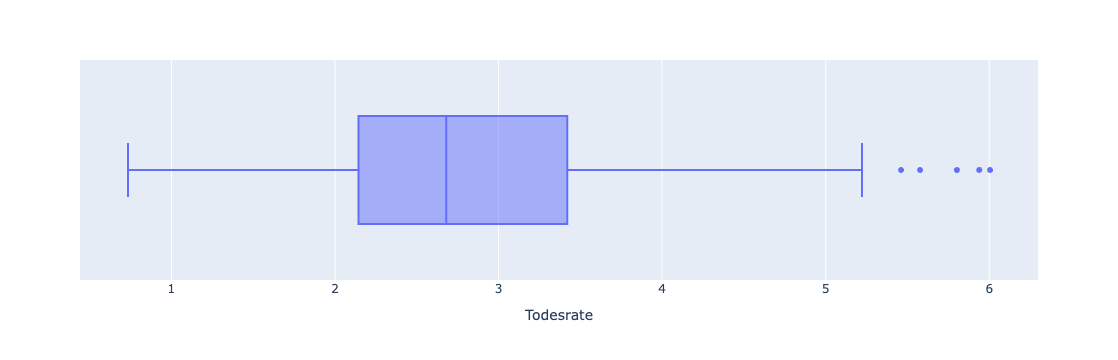

In [18]:
px.box(file, x="Todesrate")

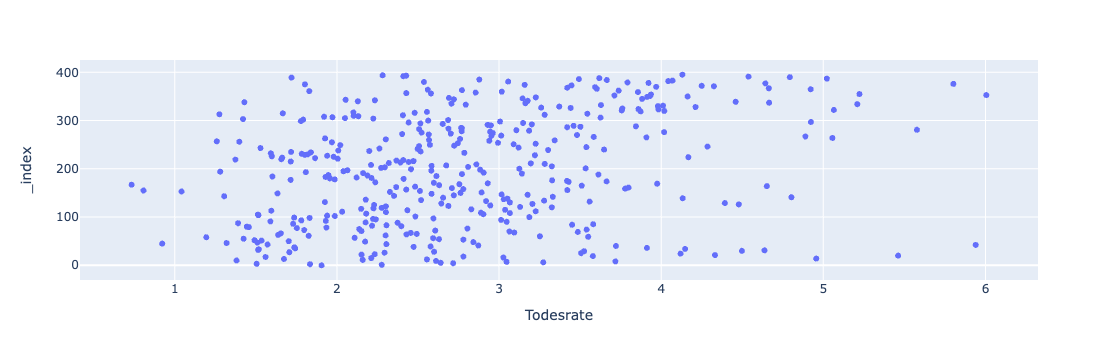

In [21]:
px.scatter(file, x="Todesrate")

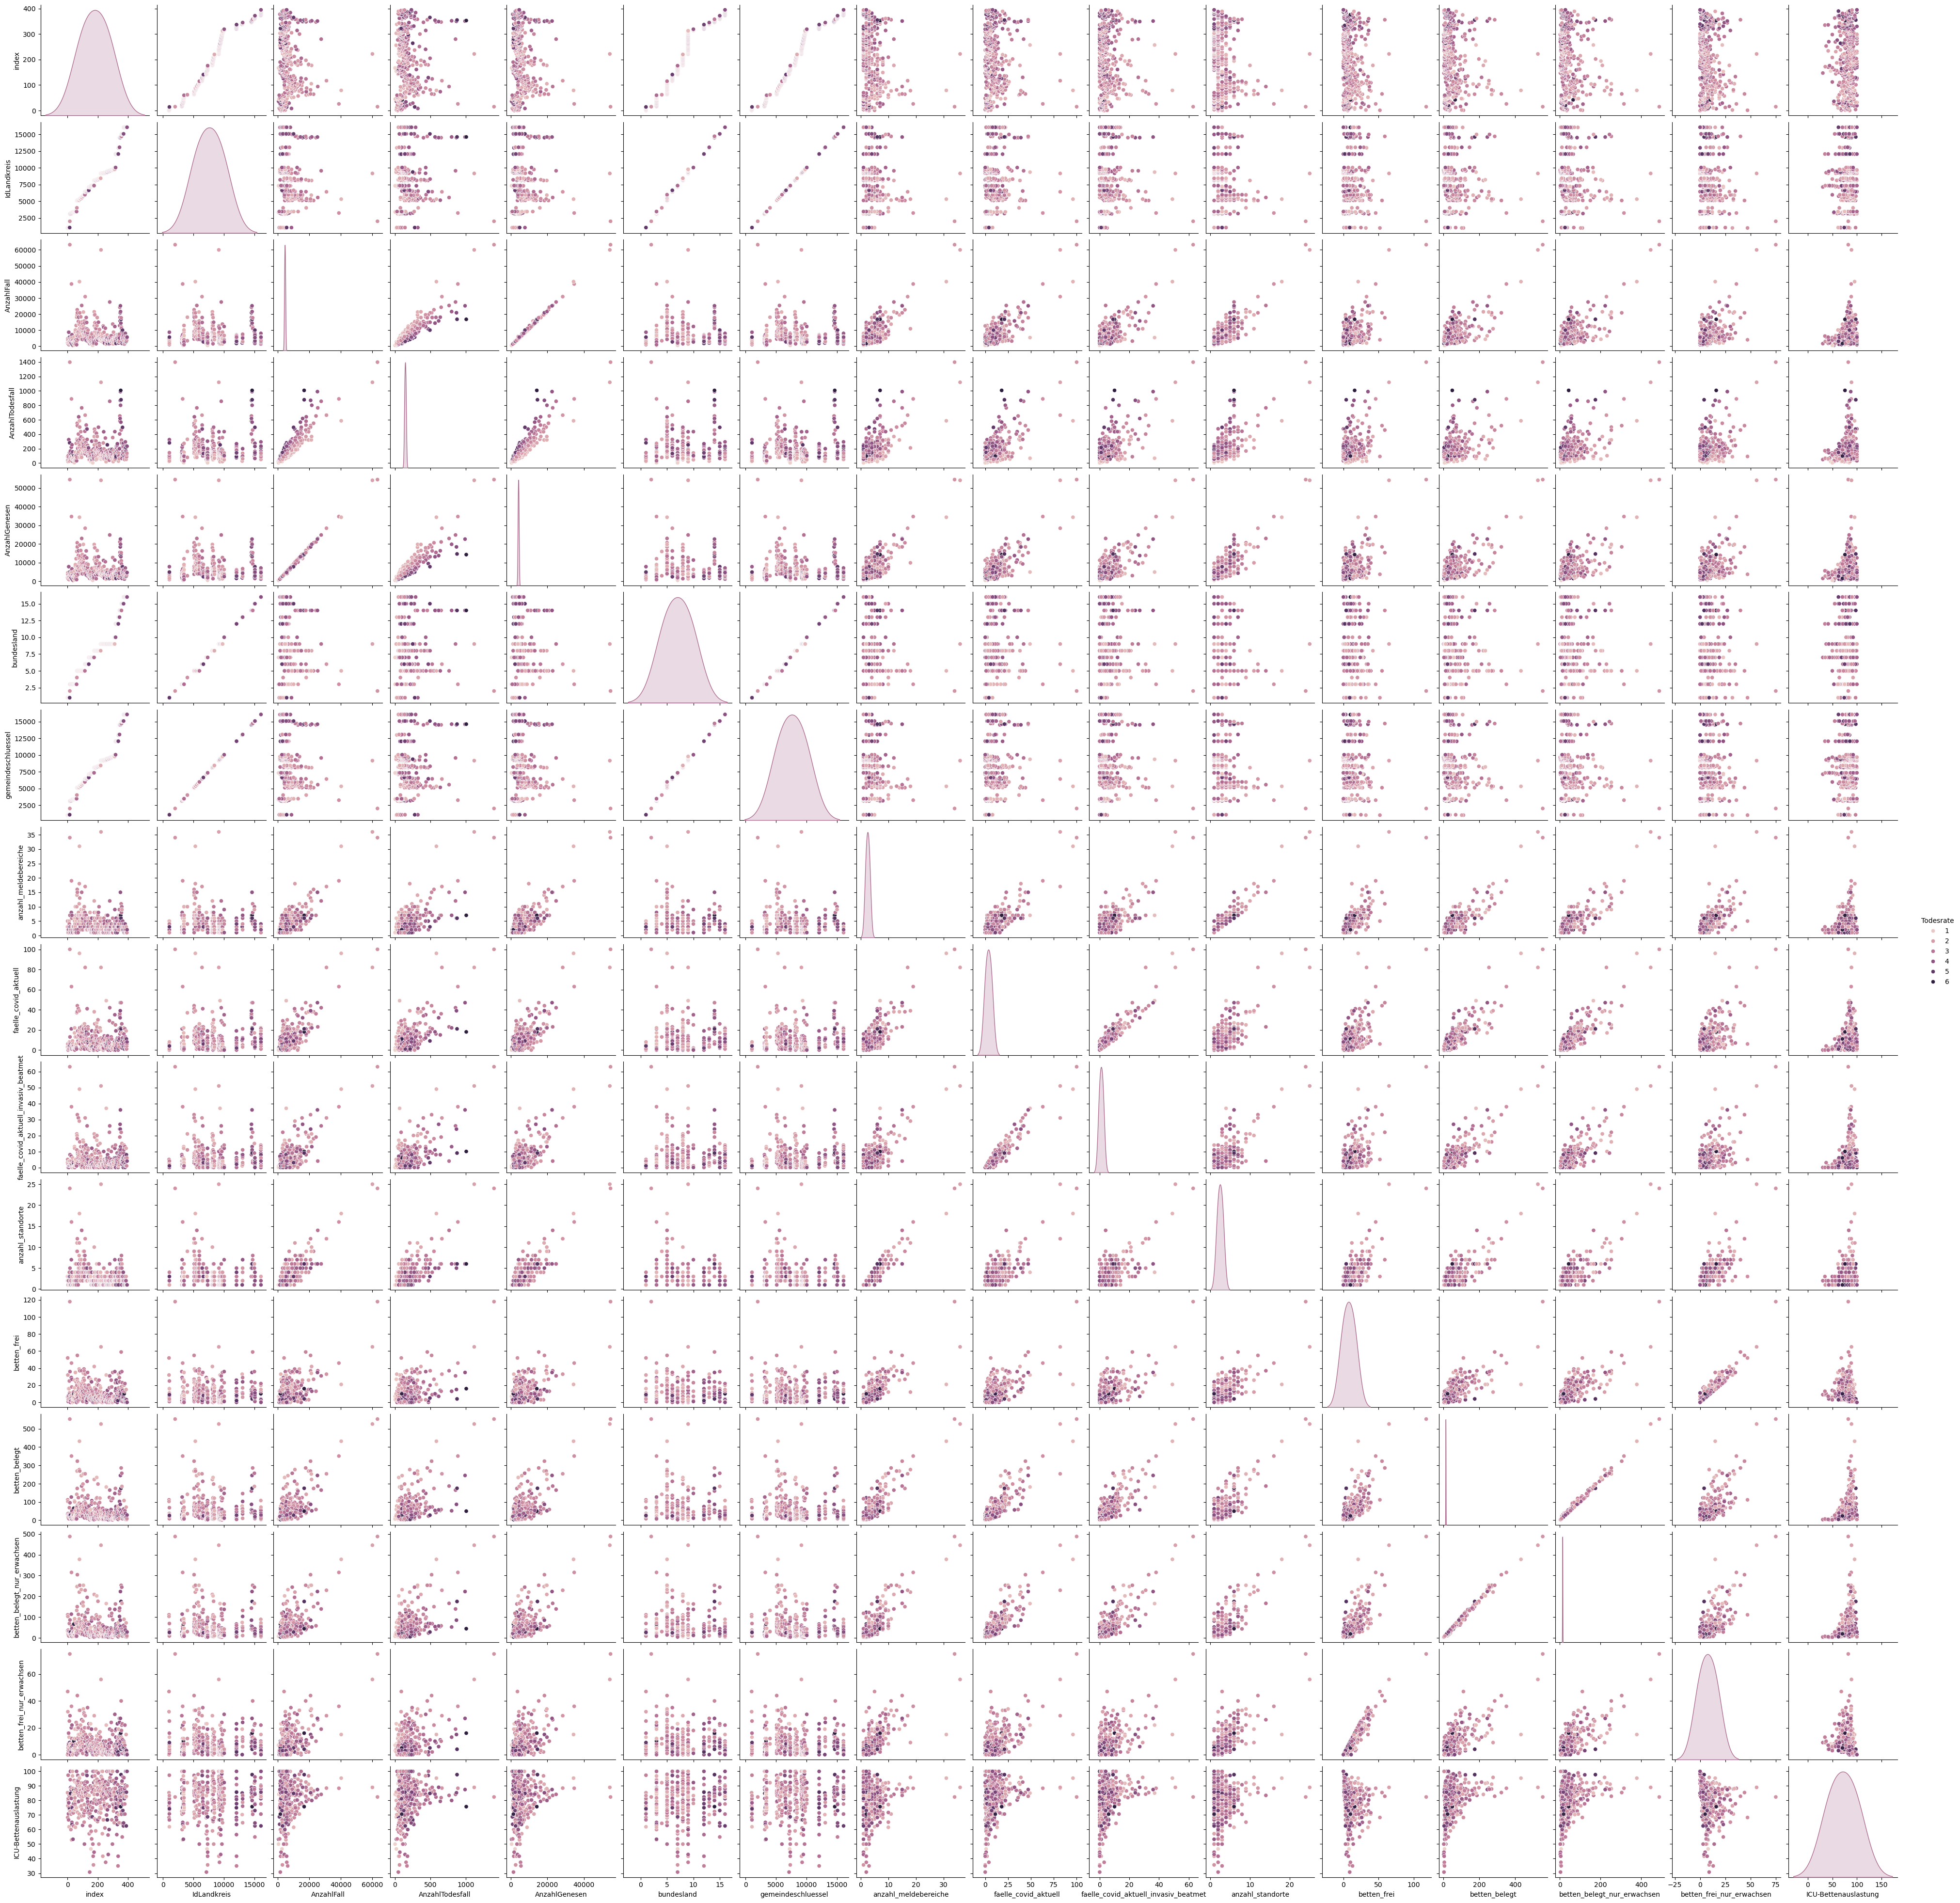

In [26]:
sns.pairplot(file, hue ="Todesrate")

Sie bekommen die Aufgabe alle Landkreise mit kritischer Bettenauslastung herauszufiltern. Als kritischer Wert werden alle Kreise, die eine Auslastung von über 90% erreicht haben festgelegt. Filtern Sie das bestehende Dataset um die Stadt/Landkresie herauszufinden. Hinweis: Nutzen Sie dafür die .loc-Methode

In [51]:
file2 = pd.read_sql_query("SELECT * FROM corona_daten WHERE betten_belegt/(betten_belegt+betten_frei)*100>=90", engine)

In [52]:
file2.IdLandkreis

0      3151
1      3257
2      3462
3      6434
4      6438
5      7332
6      7339
7      8126
8      8216
9      9174
10     9179
11     9375
12     9475
13     9476
14     9565
15     9572
16     9574
17     9671
18     9675
19     9676
20     9679
21    12066
22    16068
23    16069
24    16074
25    16075
26    16077
Name: IdLandkreis, dtype: int64

In [47]:
len(file2)

# bir daha bak

27

In [46]:
len(file.loc[file['ICU-Bettenauslastung'] >= 90,:])

94

# querying, selecting, grouping, filtering